# Imports 

In [78]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.pipeline
import sklearn.preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.utils import shuffle
import sklearn.neighbors
from scipy.spatial import Voronoi, voronoi_plot_2d

# Get data from url

In [80]:
urlmat = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-mat.csv'
dfmat = pd.read_csv(urlmat)

urlpor = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-por.csv'
dfpor = pd.read_csv(urlpor)

#dataset with numbers for each categorical variable
urlporbin = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-por-binary.csv'
dfporbin = pd.read_csv(urlporbin)
dfporbin = shuffle(dfporbin)

# Function for a scatter plot

In [128]:
#function to make a scatter plot
def scatter_plot(feature,target):
    plt.figure(figsize=(16,8))
    plt.scatter(
        feature,
        target,
        c='black')
    plt.show()

#  Ploting grades G3 against romantic relationships

Bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


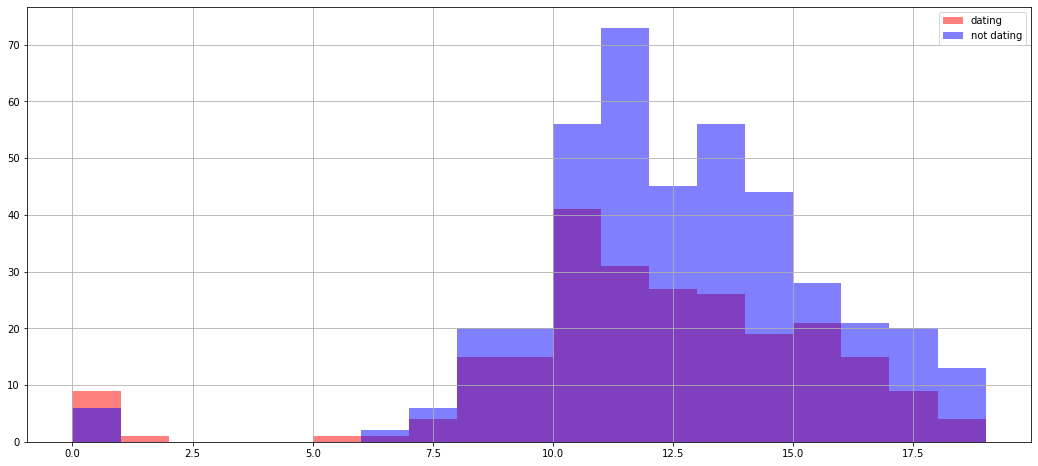

In [83]:
bins = np.arange(0, 20, 1)
print("Bins:", bins)

ax = dfpor.loc[dfpor.romantic == "yes", "G3"].hist(bins=bins, color="red", alpha=0.5, label="dating", figsize=(18, 8))
dfpor.loc[dfpor.romantic == "no", "G3"].hist(bins=bins, color="blue", ax=ax, alpha=0.5, label="not dating")
ax.legend();

# Model using extra educational support, mothers and fathers education and G2 grades to predict G3 grades
## Data NOT split into train vs test

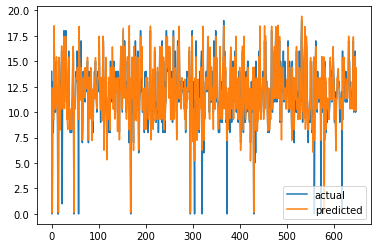

0.8440322505049299


In [110]:
dfmedu = dfporbin[['schoolsup','Medu','Fedu','G2','G3']]
x = dfmedu.values[ :, :4]
y = dfmedu.values[ :, 4:]
r1 = LinearRegression().fit(x, y)
y1 = reg.predict(x)
plt.plot(list(y), label = 'actual')
plt.plot(list(y1), label = 'predicted')
plt.legend()
plt.show()
print(r1.score(x, y))

# Model using ALL features. Data NOT split into test v train

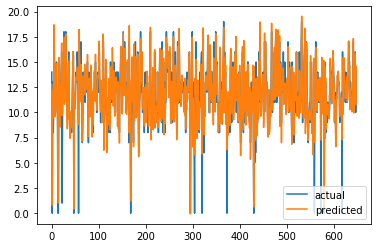

0.8570059569236035


In [111]:
x = dfporbin.values[ :, :32]
y = dfporbin.values[ :, 32:]
r2 = LinearRegression().fit(x, y)
y2 = r2.predict(x)
plt.plot(list(y), label = 'actual')
plt.plot(list(y2), label = 'predicted')
plt.legend()
plt.show()
print(r2.score(x, y))

## same thing but with lasso

[-0.22447704 -0.13533526  0.03142149  0.13752837  0.04653798 -0.04389509
  0.01472604 -0.09464819 -0.01103357 -0.07169304 -0.          0.06726637
  0.14041679  0.0457017  -0.21817373 -0.22988029  0.12516704 -0.14720797
  0.02554597 -0.07770603  0.20764174  0.10788568 -0.05144479 -0.02483328
 -0.03468252 -0.01929354 -0.07428053 -0.00622616 -0.04399115  0.01441742
  0.12608814  0.87176635]
0.8569938124709018


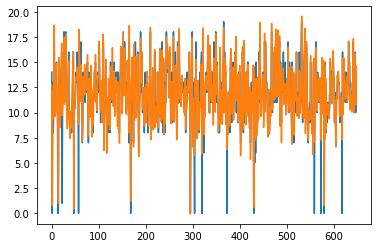

In [113]:
x = dfporbin.values[ :, :32] 
y = dfporbin.values[ :, 32:] #gives you last column G3
r3 = linear_model.Lasso(alpha=0.001) #change alpha to adapt lasso affect
r3.fit(x,y)
##display the coefficients for each of the features
print(r3.coef_)
#print(clf.intercept_)
y3 = r3.predict(x)
plt.plot(list(y), label = 'actual')
plt.plot(list(y3), label = 'predicted')
print(r3.score(x, y))

# Splitting data into train vs test

In [114]:
msk = np.random.rand(len(dfporbin)) < 0.75
train = dfporbin[msk]
test = dfporbin[~msk]
print(len(test))
print(len(train))

166
483


## Lasso on ALL data WITH train vs test

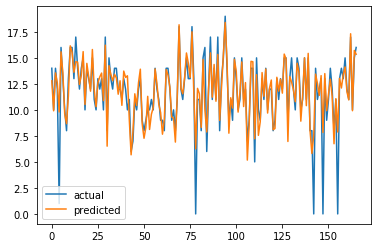

0.742174051995155


In [121]:
x_train = train.values[ :, :32]
y_train = train.values[ :, 32:]
x_test = test.values[ :, :32]
y_test = test.values[ :, 32:]
r4 = LinearRegression().fit(x_train, y_train)
y4 = r4.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y4), label = 'predicted')
plt.legend()
plt.show()
print(r4.score(x_test, y_test))

### same + lasso

[-1.68271923e-01 -0.00000000e+00  4.59215289e-02  0.00000000e+00
  2.01673204e-03 -3.65686599e-02  3.50711746e-03 -0.00000000e+00
 -6.47978741e-03 -6.06329707e-02 -1.98260262e-04  2.41174737e-02
  6.46004656e-02  6.11389598e-02 -2.31044737e-01 -2.72438499e-01
 -0.00000000e+00 -8.10528296e-02 -0.00000000e+00 -5.70255743e-02
  3.78252896e-01  1.35071758e-01 -3.90247440e-02 -2.48702165e-03
 -3.21320919e-02 -5.91716652e-02 -3.32460025e-02 -3.44085584e-02
 -2.98757183e-02  1.18944027e-02  1.03827192e-01  8.71185251e-01]


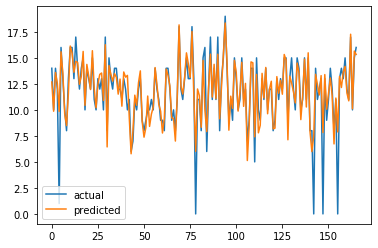

0.7457922655014673


In [122]:
#print(train.columns)
x_train = train.values[ :, :32]
y_train = train.values[ :, 32:]
x_test = test.values[ :, :32]
y_test = test.values[ :, 32:]
r5 = linear_model.Lasso(alpha=0.01)
r5.fit(x_train,y_train)
print(r5.coef_)
#print(r5.intercept_)
y5 = r5.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y5), label = 'predicted')
plt.legend()
plt.show()
print(r5.score(x_test, y_test))

# Model using ONLY grades. How G1,G2 affect G3

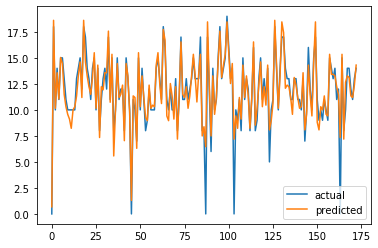

0.8614034081952787


In [155]:
df1 = dfporbin[['G1','G2','G3']]

tt = np.random.rand(len(df1)) < 0.75
train = df1[tt]
test = df1[~tt]

x_train = train.values[ :, :2]
y_train = train.values[ :, 2:]
x_test = test.values[ :, :2]
y_test = test.values[ :, 2:]
r6 = LinearRegression().fit(x_train, y_train)
y6 = r6.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y6), label = 'predicted')
plt.legend()
plt.show()
print(r6.score(x_test, y_test))

## same + lasso

[0.1428564  0.88138251]
0.8607313352479165


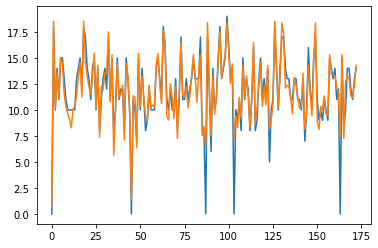

In [156]:
x_train = train.values[ :, :2]
y_train = train.values[ :, 2:]
x_test = test.values[ :, :2]
y_test = test.values[ :, 2:]
r7 = linear_model.Lasso(alpha=0.1)
r7.fit(x_train,y_train)
print(r7.coef_)
#print(clf.intercept_)
y7 = r7.predict(x_test)
plt.plot(y_test)
plt.plot(y7)
print(r7.score(x_test, y_test))

## Comparing the two algorithms 

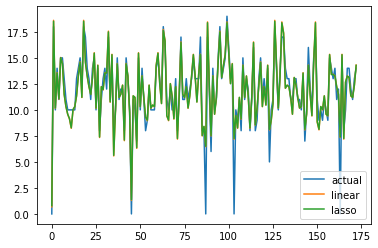

0.8614034081952787
0.8607313352479165


In [157]:
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y6), label = 'linear')
plt.plot(list(y7), label = 'lasso')
plt.legend()
plt.show()
print(r6.score(x_test,y_test))
print(r7.score(x_test,y_test))#with lasso

# Joining grade data for maths and portuguese

In [126]:
##please note that this data hasnt been properly achieved

dfm1 = dfmat[['G1','G2','G3']]
dfp1 = dfpor[['G1','G2','G3']]
dfp1 = dfp1.rename(columns={"G1": "GP1", "G2": "GP2", 'G3':'GP3'})
dfmp = pd.concat([dfm1,dfp1], axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
##drop NaN rows
dfmp=dfmp.dropna()
dfmp

,G1,G2,G3,GP1,GP2,GP3
0,5.0,6.0,6.0,0,11,11
1,5.0,5.0,6.0,9,11,11
2,7.0,8.0,10.0,12,13,12
3,15.0,14.0,15.0,14,14,14
4,6.0,10.0,10.0,11,13,13
...,...,...,...,...,...,...
390,9.0,9.0,9.0,14,13,14
391,14.0,16.0,16.0,11,13,14
392,10.0,8.0,7.0,12,13,15
393,11.0,12.0,10.0,14,14,15


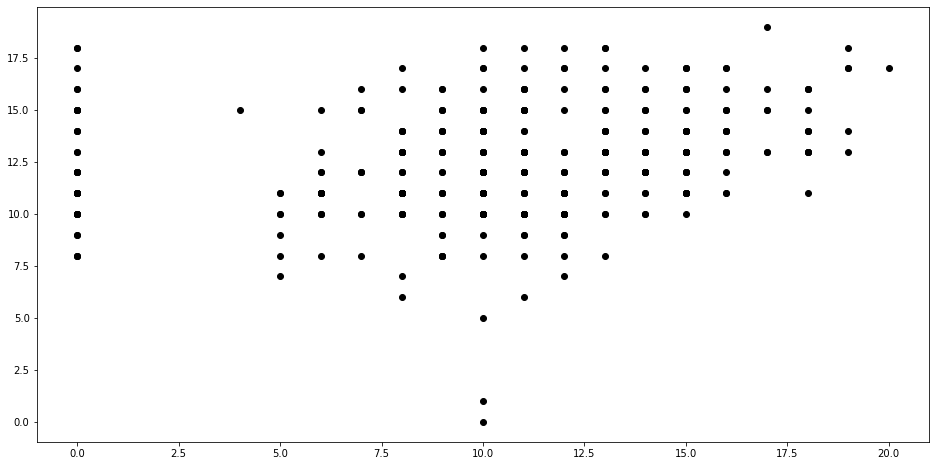

In [129]:
scatter_plot(dfmp['G3'],dfmp['GP3'])

In [150]:
#removes 40 students who got 0 in their final
    #counting them as missing values
dfmp = dfmp.loc[dfmp['G3']!=0]
dfmp

,G1,G2,G3,GP1,GP2,GP3
0,5.0,6.0,6.0,0,11,11
1,5.0,5.0,6.0,9,11,11
2,7.0,8.0,10.0,12,13,12
3,15.0,14.0,15.0,14,14,14
4,6.0,10.0,10.0,11,13,13
...,...,...,...,...,...,...
390,9.0,9.0,9.0,14,13,14
391,14.0,16.0,16.0,11,13,14
392,10.0,8.0,7.0,12,13,15
393,11.0,12.0,10.0,14,14,15


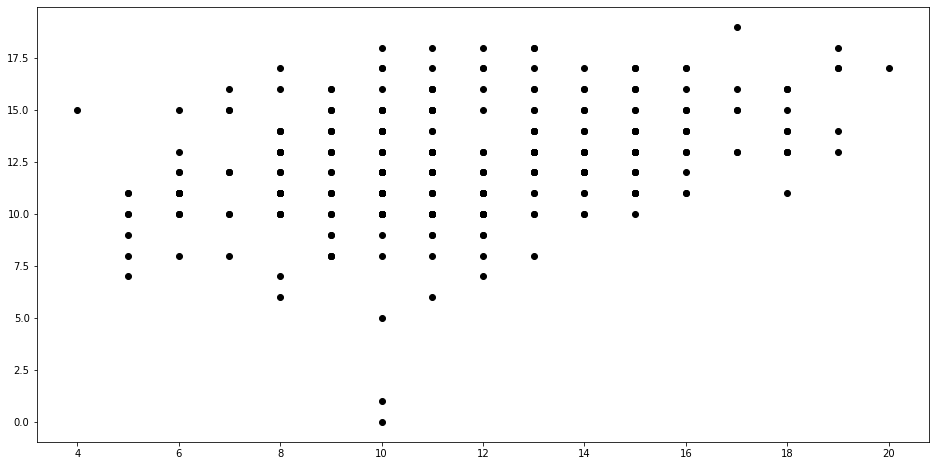

In [149]:
scatter_plot(dfmp['G3'],dfmp['GP3'])

[0.         0.         0.01621362 0.09440269 0.85060169]
0.7756685782784131


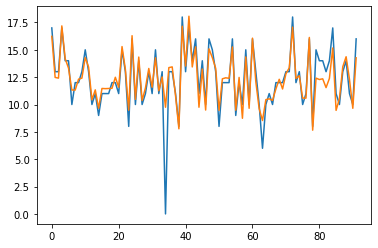

In [161]:
tt1 = np.random.rand(len(dfmp)) < 0.75
train = dfmp[tt1]
test = dfmp[~tt1]

x_train = train.values[ :, :5]
y_train = train.values[ :, 5:]
x_test = test.values[ :, :5]
y_test = test.values[ :, 5:]
r8 = linear_model.Lasso(alpha=0.1)
r8.fit(x_train,y_train)
print(r8.coef_)
#print(clf.intercept_)
y8 = r8.predict(x_test)
plt.plot(y_test)
plt.plot(y8)
print(r8.score(x_test, y_test))